In [ ]:
%pip install pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# This note is for validating the anomalies flagged
# Load preprocessed data
df_train = pd.read_csv("anomalies/anomalies_train.csv")

# Verify anomalies
anomalies = df_train[df_train['is_anomalous'] == True]
print("Total anomalies detected:", len(anomalies))
print(anomalies.head())


Total anomalies detected: 6852
                  timestamp log_level                          source  \
0   2017-05-16 15:15:54.960      INFO            nova.compute.manager   
8   2017-05-16 15:16:02.909      INFO  nova.osapi_compute.wsgi.server   
66  2017-05-16 15:16:23.801      INFO            nova.compute.manager   
69  2017-05-16 15:16:23.947      INFO            nova.compute.manager   
94  2017-05-16 15:16:32.602      INFO            nova.compute.manager   

                              request_id                           user_id  \
0   7a738b84-d574-43c6-a6c4-68c164365101  e887c6de57b5411cb33a5943be2d3c1a   
8   ebab86b4-70ec-4d4f-bad3-a50e0afa0ff8  113d3a99c3da401fbd62cc2caa5b96d2   
66  ebab86b4-70ec-4d4f-bad3-a50e0afa0ff8  113d3a99c3da401fbd62cc2caa5b96d2   
69  ebab86b4-70ec-4d4f-bad3-a50e0afa0ff8  113d3a99c3da401fbd62cc2caa5b96d2   
94  1daa2cd3-a3a4-4eb4-9991-20cf38169d0b  113d3a99c3da401fbd62cc2caa5b96d2   

                          project_id       internal_ip  \
0  

/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_9289/3902903678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=anomalies, x='status_code', palette='coolwarm')


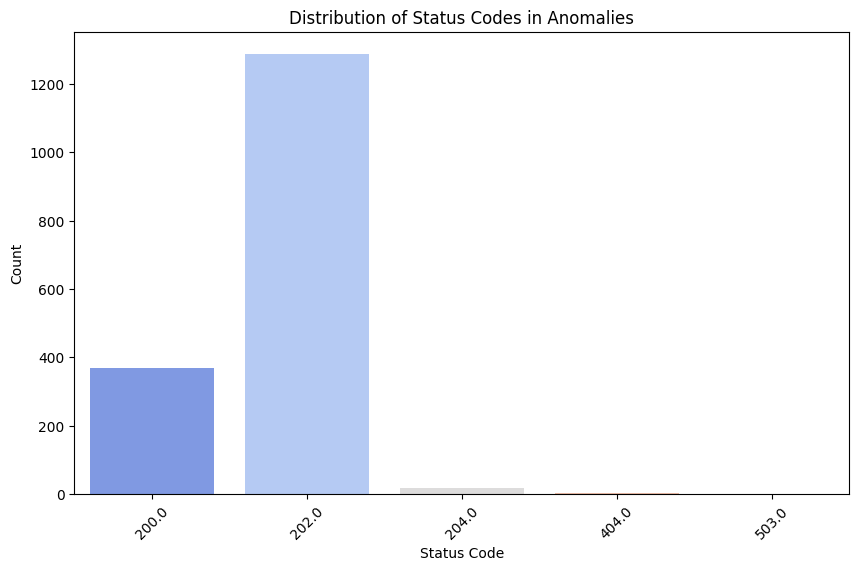

In [8]:
# Count of anomalous status codes
plt.figure(figsize=(10, 6))
sns.countplot(data=anomalies, x='status_code', palette='coolwarm')
plt.title("Distribution of Status Codes in Anomalies")
plt.xlabel("Status Code")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


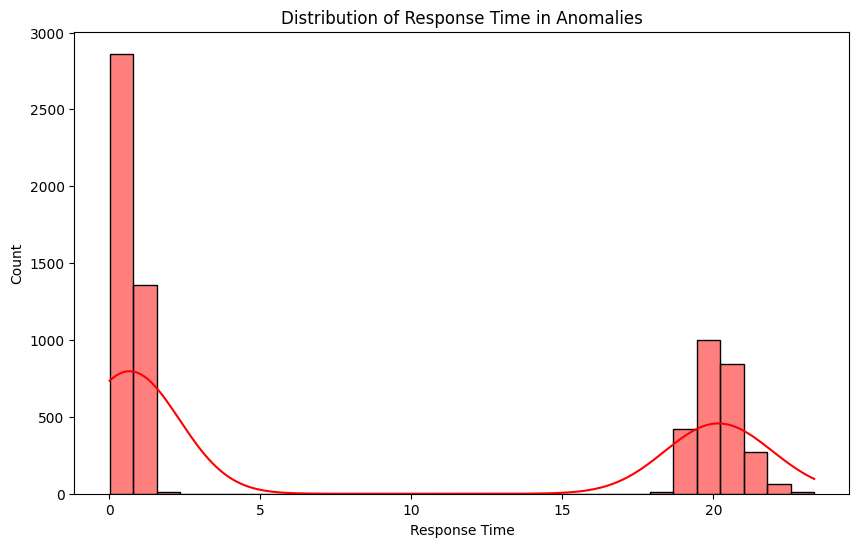

In [9]:
# Distribution of anomalous response times
plt.figure(figsize=(10, 6))
sns.histplot(anomalies['response_time'], kde=True, bins=30, color='red')
plt.title("Distribution of Response Time in Anomalies")
plt.xlabel("Response Time")
plt.show()


Top 5 Anomalous Sources:
source
nova.compute.manager              5172
nova.osapi_compute.wsgi.server    1624
nova.metadata.wsgi.server           56
Name: count, dtype: int64


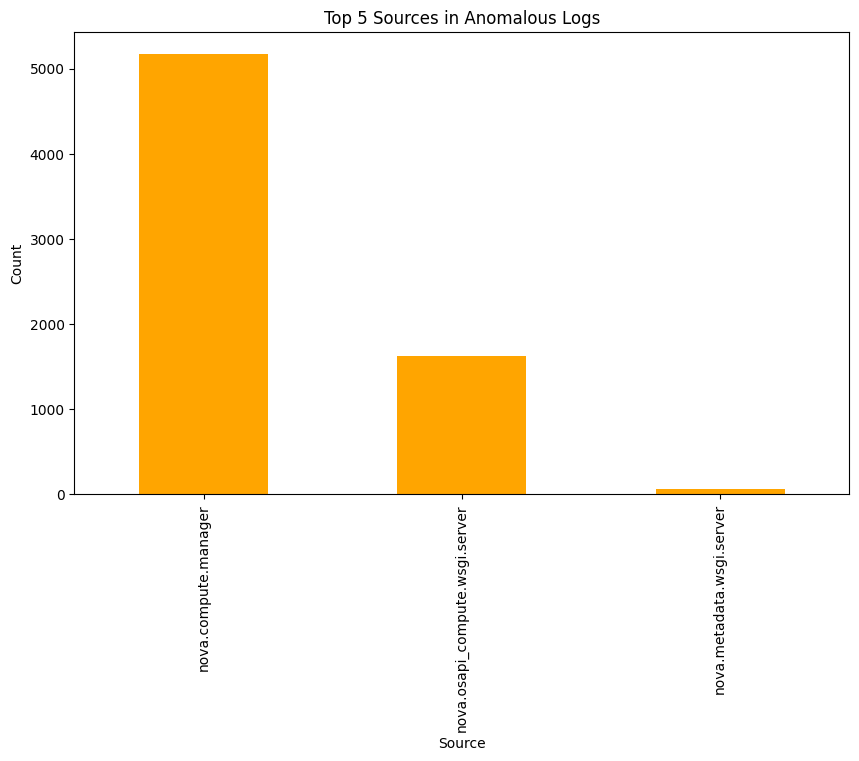

In [13]:
# Top 5 sources contributing to anomalies
top_sources = anomalies['source'].value_counts().head(5)
print("Top 5 Anomalous Sources:")
print(top_sources)

# Bar chart for top sources
plt.figure(figsize=(10, 6))
top_sources.plot(kind='bar', color='orange')
plt.title("Top 5 Sources in Anomalous Logs")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

# Top 5 client IPs contributing to anomalies
if 'client_ip' in anomalies.columns:
    top_ips = anomalies['internal_ip'].value_counts().head(5)
    print("Top 5 Client IPs in Anomalous Logs:")
    print(top_ips)
    
    # Bar chart for top client IPs
    plt.figure(figsize=(10, 6))
    top_ips.plot(kind='bar', color='purple')
    plt.title("Top 5 Client IPs in Anomalous Logs")
    plt.xlabel("Client IP")
    plt.ylabel("Count")
    plt.show()


/var/folders/wk/l8__rsrn5v73832q54dxsh480000gn/T/ipykernel_9289/669404377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['timestamp'] = pd.to_datetime(anomalies['timestamp'], errors='coerce')


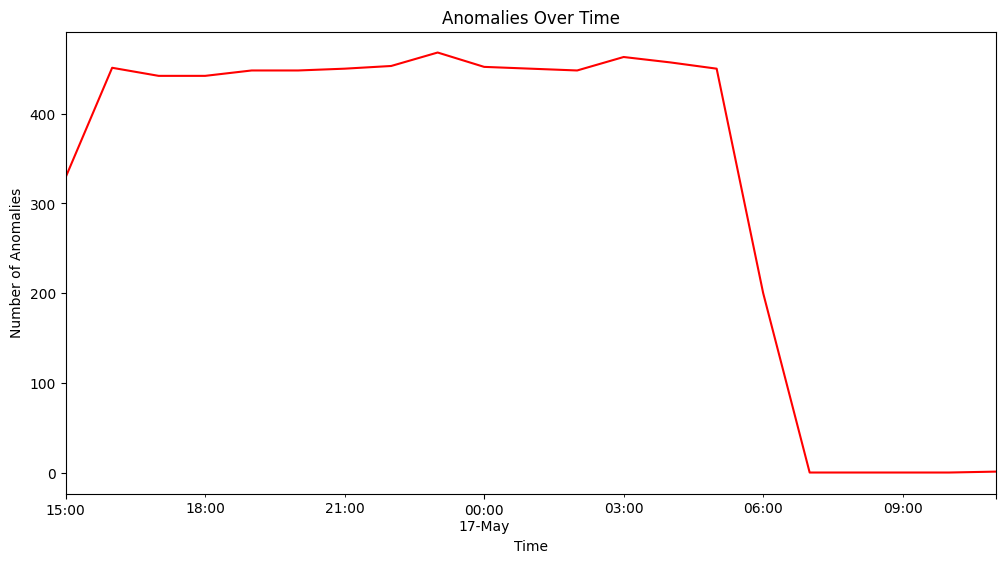

In [11]:
# Convert timestamp column to datetime
if 'timestamp' in anomalies.columns:
    anomalies['timestamp'] = pd.to_datetime(anomalies['timestamp'], errors='coerce')
    
    # Group anomalies by hour
    anomalies_over_time = anomalies.resample('H', on='timestamp').size()
    
    # Plot anomalies over time
    plt.figure(figsize=(12, 6))
    anomalies_over_time.plot(kind='line', color='red', title='Anomalies Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Anomalies')
    plt.show()
